# SC1015 Mini-Project

Group: FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, \
Wee Zi Hao, U2323380H



**TO-DO**:

1. Finish data cleaning by fixing skew in data 

If possible, find a better/more ways of visualising distribution of categorical data than just countplot. Also find justification for removing outliers in data, and determine logical ways to fix skew in data.

2. Exploratory analysis
3. Logistic Regression etc

Some techniques we can consider:

Logistic Regression \
Naive Bayes \
Random Forest Classifier \
Extreme Gradient Boost \
K-Nearest Neighbour \
Decision Tree \
Support Vector Machine

**REMEMBER:**

1. Remember to add README file (3-5 minute summary, with all consulted references). 
2. Add citations/references for introduction
3. Weekly consultation with TA
4. Determine what techniques we will use in our project (logistic regression, decision tree/random forest, gridsearchcv)
5. Submit our presentation video, PPT/PDF slides used for the presentation and all code on github with their references.

**NOTE**:
1. Use snake-case naming convention
2. Use "" for strings and 4-space indentation.

## Introduction

Heart disease, also known as cardiovascular disease (CVD), refers to a range of conditions that affect the heart and blood vessels. As a whole, it is one of the leading causes of death globally, taking an estimated 17.9 million lives annually. In Singapore alone, CVD accounted for 31.4% of all deaths in 2022.

Early detection of heart diseases is cruical towards reducing suffering and preventing further heart complications. Such early identification would also aid in helping one change their lifestyle factors before it may be too late.

Current traditional methods of detecting CVD include electrocardiography (ECG) and angiography. Although ECG is non-invasive, it cannot provide a definite diagnosis of CVD. Conversely, while angiography may provide a more definite diagnosis, it is invasive and can have various side effects and complications.


Our project aims to provide a measure to detect CVD in a non-invasive but definite way for early screening purposes.

## Problem Statement

How may we accurately detect heart disease in a patient?\
Can we identify whether a patient has a heart disease or not accurately? (I think this problem statement more clear that we dealing with a class A or class B type of problem)

### Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp`: Chest pain type (4 values) (Categorical)
4. `trestbps`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol`: Serum cholestoral in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak`: ST depression induced by exercise relative to rest (Numerical)
11. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
12. `ca`: Number of major vessels (0-3) colored by flourosopy (Categorical)
13. `thal`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
14. `target`: 0 = no heart disease; 1 = heart disease (Categorical)

The names and social security numbers of the patients have been removed from the database and replaced with dummy values.

## Overview

> 10% for coming up with your own problem definition based on a dataset \
10% for data preparation and cleaning to suit the problem of your choice \
20% for exploratory data analysis/visualization to gather relevant insights \
20% for the use of machine learning techniques to solve specific problem \
20% for the presentation of data-driven insights and the recommendations \
10% for the quality of your final team presentation and overall impressions \
10% for learning something new and doing something beyond this course 

1. Basic Exploration Analysis
2. Data Cleaning
3. Exploratory Data Analysis/Visualisation
4. Logistic Regression
5. Decision Tree & Random Forest
6. New technique beyond the course
7. Comparing our models
8. Insights and Conclusions

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

sb.set() # set the default Seaborn style for graphics

### Import the Dataset

Dataset on [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 

### Context

This dataset dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [2]:
data = pd.read_csv("heart.csv")

print("Data dimensions:", data.shape)

data

Data dimensions: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Initial Exploratory Analysis

From our attribute information, we know that variables such as `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal` and `target` are categorical values. The remaining data should be numerical. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


## Data Cleaning

> The dataset chosen by you may not be in the proper format to solve the problem you targeted. Preparing means cleaning the data, resizing/reshaping the data, removing outliers (if necessary), balancing imbalanced classes (if necessary), grouping the rows/columns as necessary, etc.

Notice from the attribute information that `thal` should be between 1-3 and `ca` should be between 0-3, but from the statistical summary of the data, we can see that there are some 0 `thal` values in the data (min = 0.00) and 4 `ca` values in the data (max = 4.00). Let us first remove these data.

In [5]:
clean_data = data[(data["thal"] != 0) & (data["ca"] != 4)]
#SHOULDNT THIS BE | INSTEAD OF & COS LIDDAT U ONLY REMOVING THE DATA THAT FUFILED BOTH CONDITIONS

clean_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Checking for Skew

An imbalanced dataset could affect FPR/FNR values of our model. Let us check for skew in any of the variables. For numerical variables, we shall visualise the distributions with boxplot, histogram/KDE and violinplot. For categorical variables, we shall use countplot. 

In [6]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
num_var = [var for var in clean_data.columns if var not in cat_var]

# Make a function for visualising numerical variables
def visualise(vars: list[str], kind: str): # kind is a string argument that accepts "num" or "cat" as a value
    if kind == "num":
        f, axes = plt.subplots(len(vars), 3, figsize = (24, 12))
        for i, v in enumerate(vars):
            sb.boxplot(data = clean_data[v], orient = 'h', ax = axes[i, 0]).set(ylabel = v)
            sb.histplot(data = clean_data[v], ax = axes[i, 1], kde = True)
            sb.violinplot(data = clean_data[v], orient = "h", ax = axes[i, 2]).set(ylabel = v)
        f.tight_layout() # formatting
    elif kind == "cat":
        f, axes = plt.subplots(len(vars), figsize = (24, 12))
        for i, v in enumerate(vars):
            # we sort the classes for each categorical variable by their counts
            sb.countplot(data = clean_data, x = v, orient = "h", ax = axes[i], order = clean_data[v].value_counts().index)
        f.tight_layout() # formatting
    else:
        raise Exception("Only 'num' or 'cat' values are accepted for the kind argument")

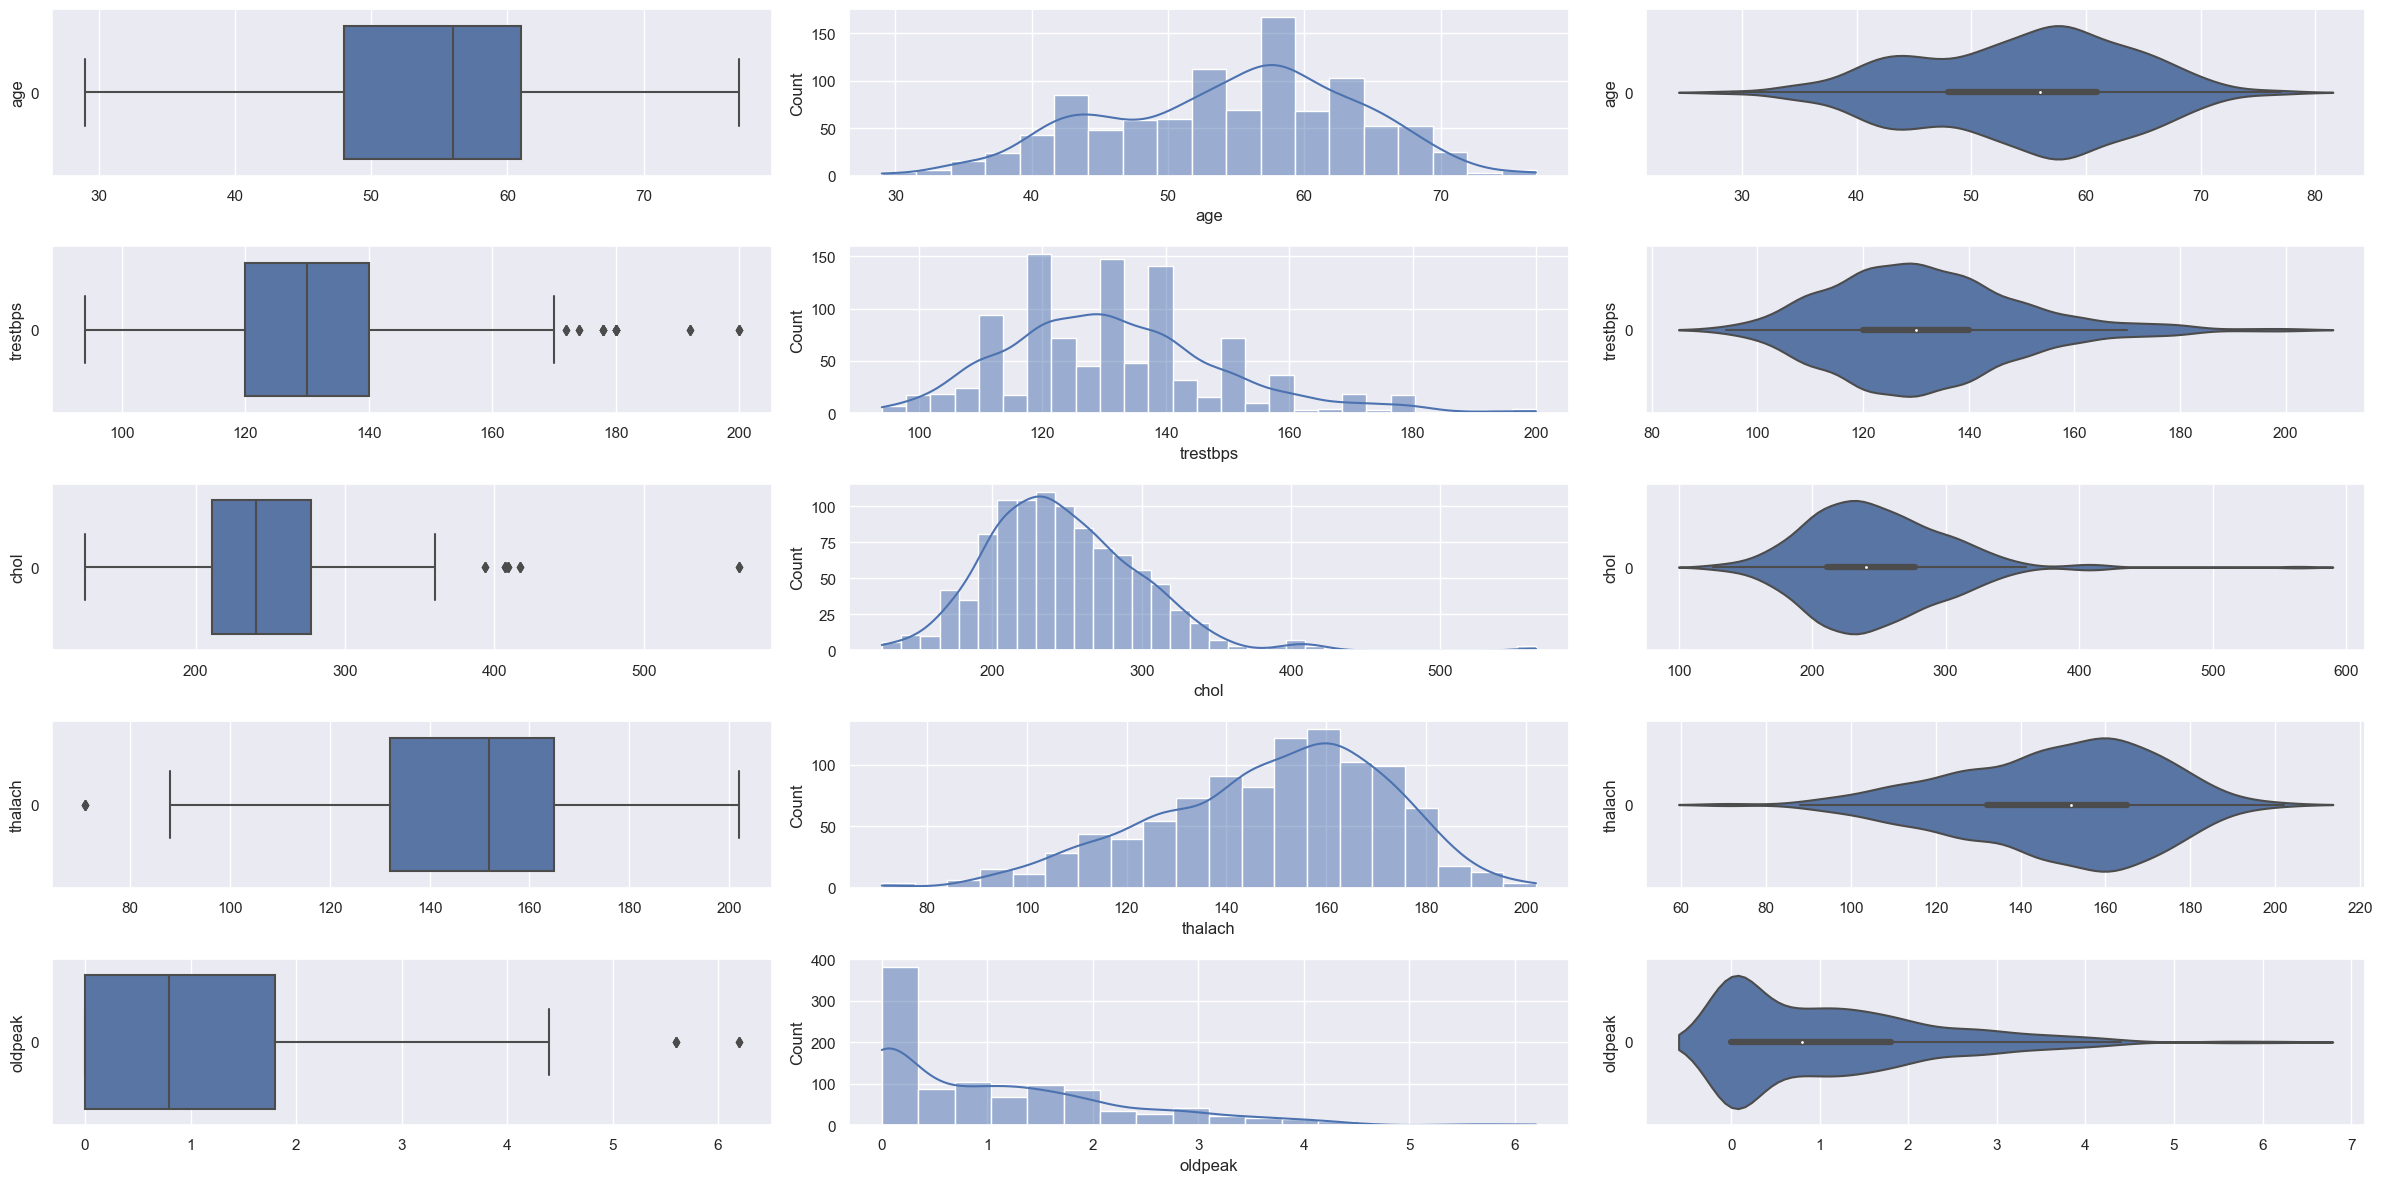

In [7]:
# Visualise the numerical variables
visualise(num_var, "num")

### Dropping Outliers

We should also drop any outliers that may affect our model. We can observe some outliers for trestbps, chol, thalach and oldpeak variables from the boxplots. Let us begin by removing them.

In [8]:
# We remove all the outliers all at once so that it does not affect the quantiles of future variables.
# To do this, we first store the lower and upper bounds of each variable in a list. 

lst = []

for v in num_var:
    IRQ = clean_data[v].quantile(0.75) - clean_data[v].quantile(0.25)
    upper = clean_data[v].quantile(0.75) + IRQ * 1.5
    lower = clean_data[v].quantile(0.25) - IRQ * 1.5
    outliers = clean_data[v][(clean_data[v] < lower) | (clean_data[v] > upper)]
    print(f"{v}: {outliers.shape[0]}")
    lst.append((lower, upper))

lst = list(zip(num_var, lst))

for v, (lower, upper) in lst:
    clean_data = clean_data[(clean_data[v] >= lower) & (clean_data[v] <= upper)]

print("\nNew dimension of clean_data:", clean_data.shape)

age: 0
trestbps: 30
chol: 16
thalach: 4
oldpeak: 7

New dimension of clean_data: (943, 14)


### Fixing Skew

We can also observe some skew for many of the numerical variables. Let us take a closer look at each of their skews by calling `.skew()` on each of the variables.

In [9]:
for v in num_var:
    print(f"{v}: {clean_data[v].skew().round(2)}")

age: -0.21
trestbps: 0.29
chol: 0.19
thalach: -0.43
oldpeak: 0.92


We can see that the skew values of `age`, `trestbps`, `chol` and `thalach` are below 0.5 and thus quite low. However, `oldpeak` has a very high positive skew value of 0.92, and we should address this. 

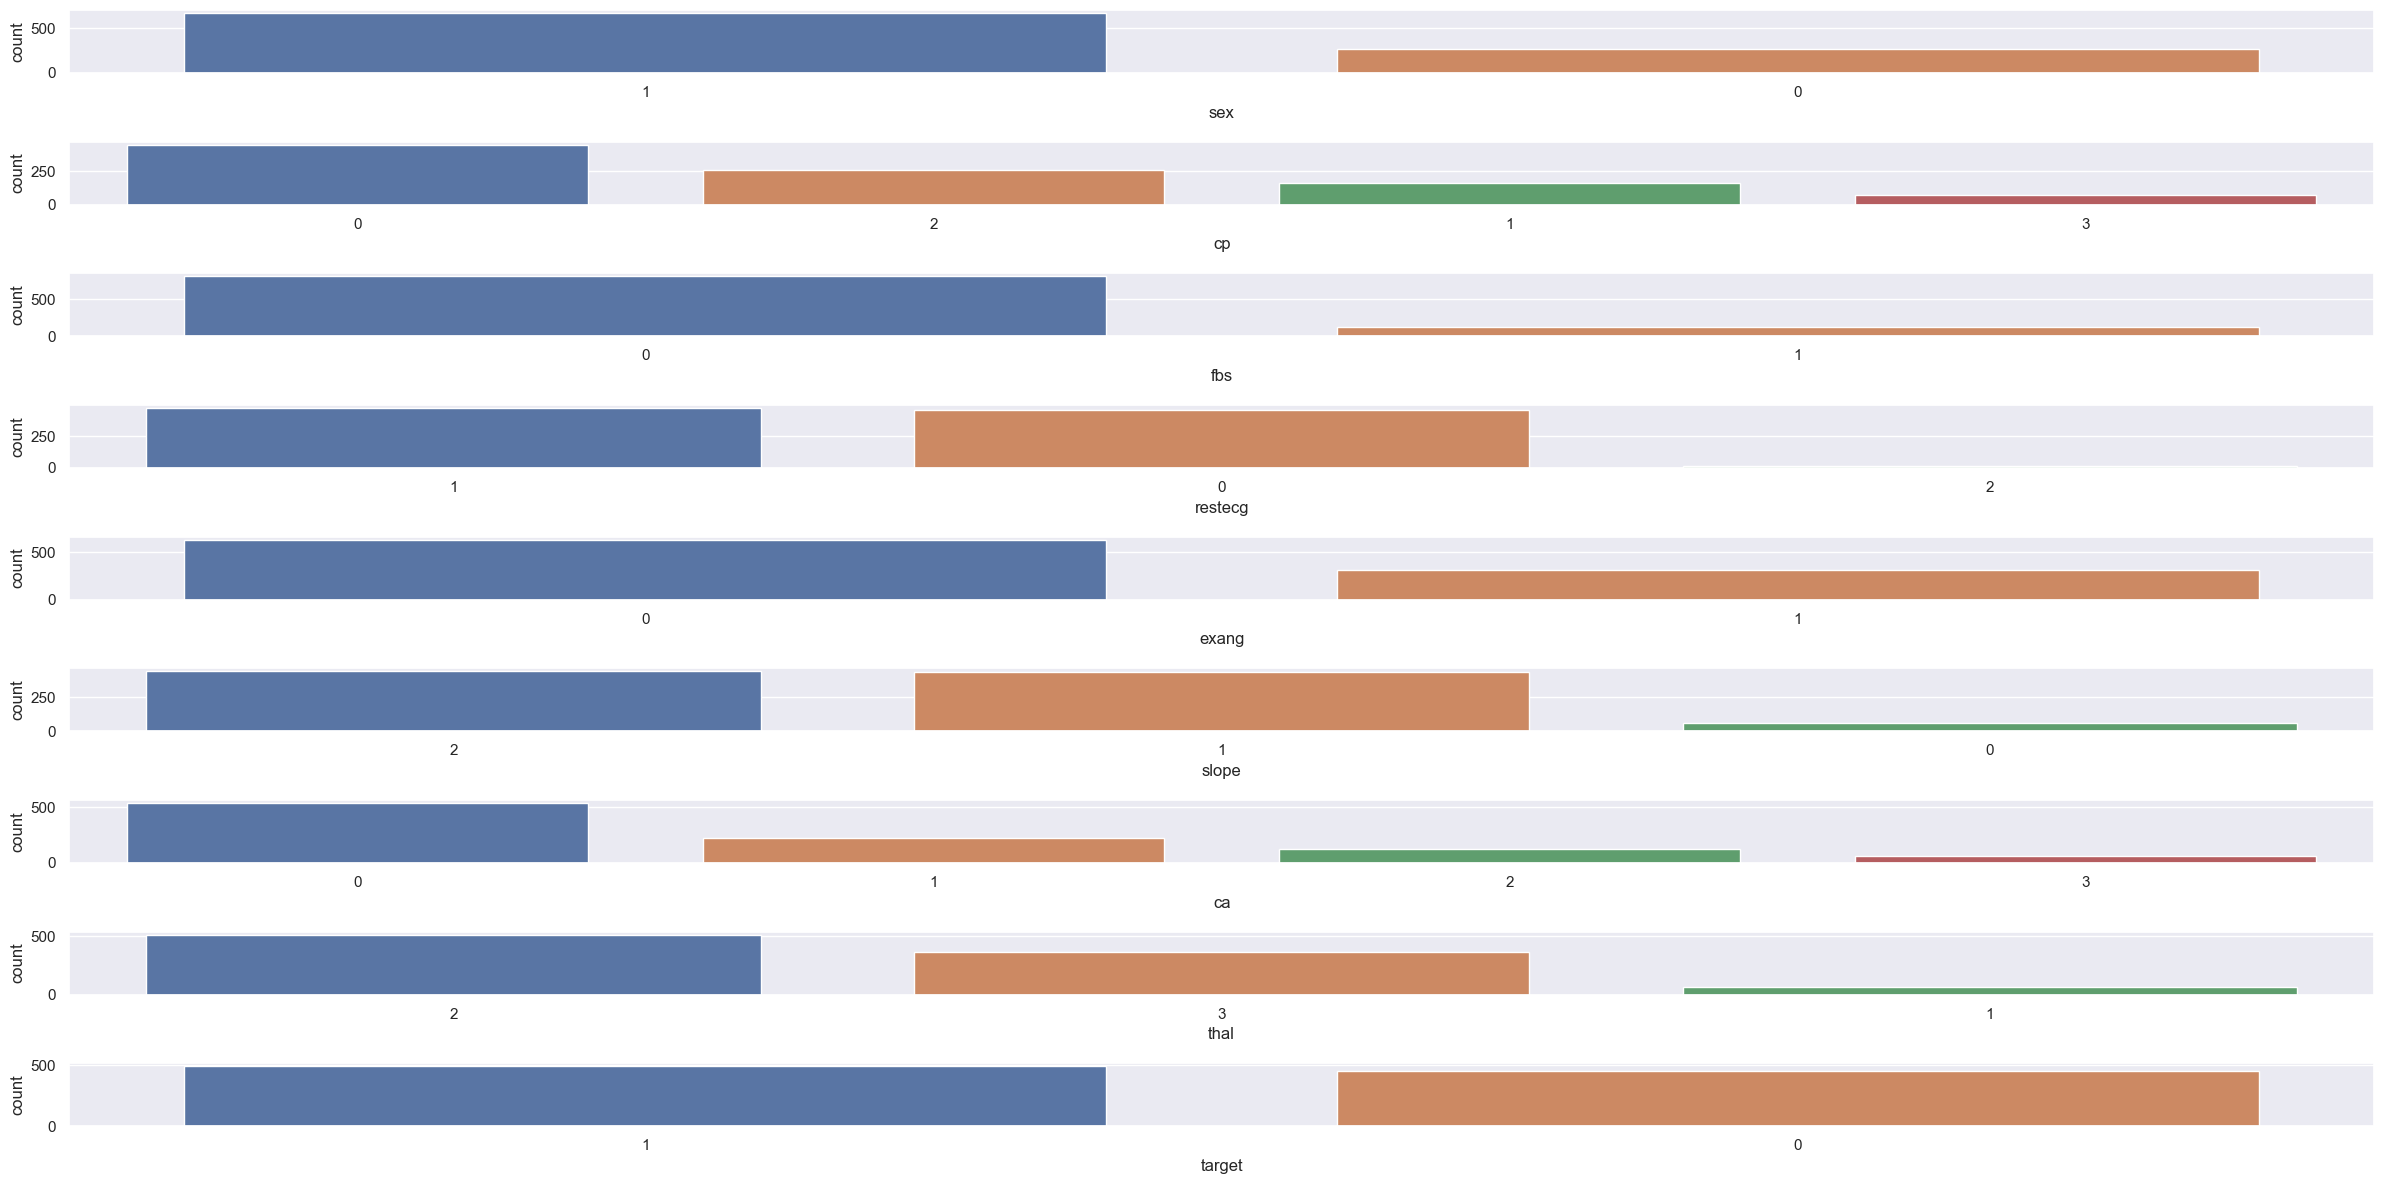

In [10]:
# Visualise the categorical variables

visualise(cat_var, "cat")

We can see that there is skew for some of the categorical variables as well.

### Feature Engineering

### Determining Relevant Variables

Now, we find our predictor variables with a strong correlation to `target`. We shall use jointplot, pearson's correlation, 

We cannot do correlation if our y axis is a categorical variable??
Since we are dealing with a binary classification problem, lets make use of the swarmplot to determine which numerical variables may be an important predictor in predicting heart disease

We will start by setting up a simple Classification Problem.

Response Variable : Heart Disease
Predictor Feature : All numerical variables in num_var

We start by splitting the cleaned numerical data sets into train and test sets randomly to perform classification

In [11]:
#Create the necessary dataframes
cleaned_numerical_data = clean_data[num_var]
age = pd.DataFrame(cleaned_numerical_data["age"])
trestbps = pd.DataFrame(cleaned_numerical_data["trestbps"])
chol = pd.DataFrame(cleaned_numerical_data["chol"])
thalach = pd.DataFrame(cleaned_numerical_data["thalach"])
oldpeak = pd.DataFrame(cleaned_numerical_data["oldpeak"])
target = pd.DataFrame(clean_data["target"])

#Compile them into a list for looping
cleaned_numerical_data_list = [age, trestbps, chol, thalach, oldpeak]

#List to store train test splits
train_splits = []
test_splits = []

#Loop to go through the numerical variables and place them into the list
for var in cleaned_numerical_data_list:
    var_train, var_test, target_train, target_test = train_test_split(var, target, test_size=0.25, random_state = 23)
    train_splits.append(var_train)
    test_splits.append(var_test)

We shall plot swarmplots to see whether each of the numerical variables could be an important predictor towards our target (heart disease)

C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


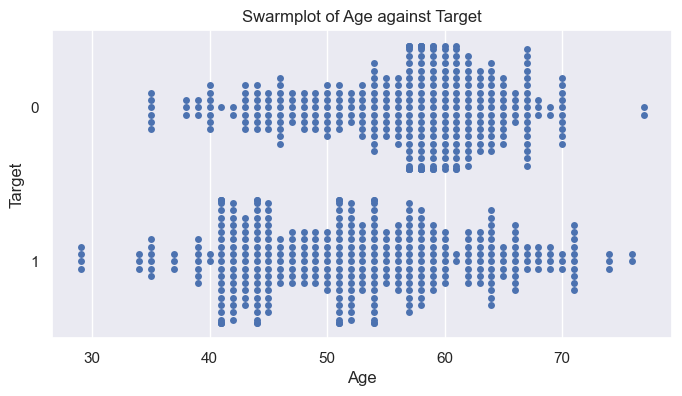

C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


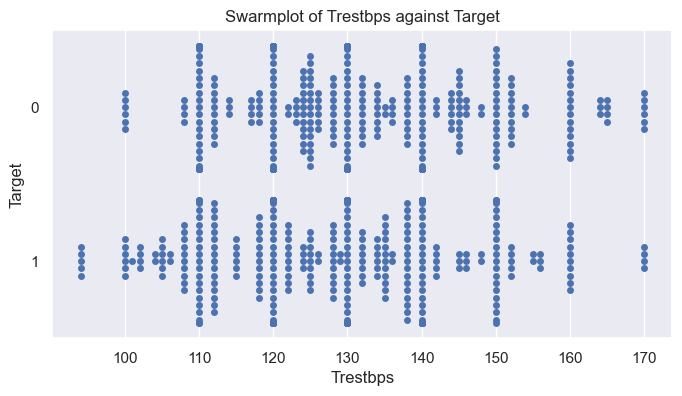

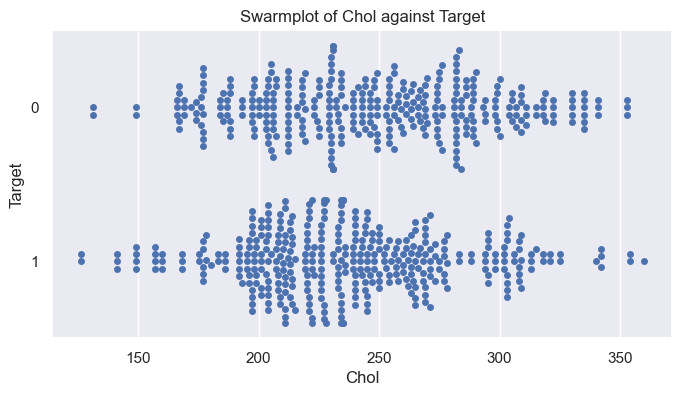

C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


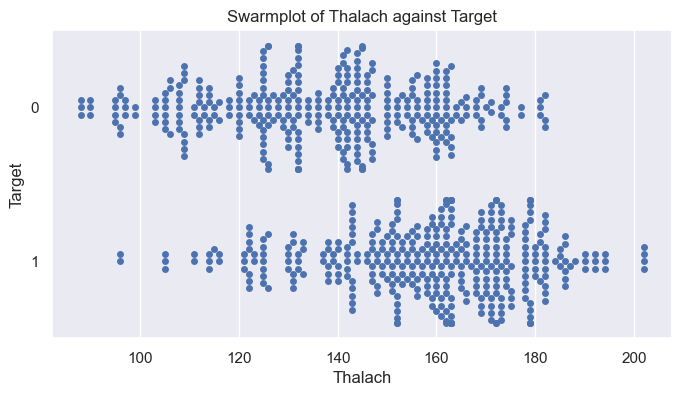

C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\weezi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


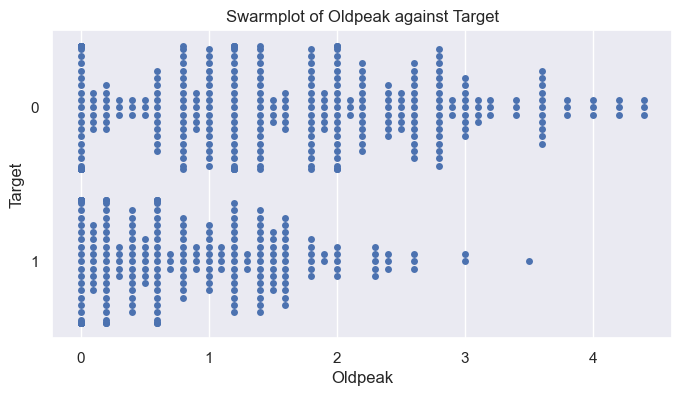

In [12]:
for i, var_name in enumerate(["age", "trestbps", "chol", "thalach", "oldpeak"]):
    #Creating the joint dataframe to plot swarmplot
    train_df = pd.concat([train_splits[i], target_train], axis=1)
    train_df.columns = [var_name, "target"]
    
    #Plotting the swarmplots
    plt.figure(figsize=(8, 4))
    sb.swarmplot(x=var_name, y="target", data=train_df, orient="h")
    plt.xlabel(var_name.capitalize())  # Capitalize the variable name for labeling
    plt.ylabel("Target")
    plt.title(f"Swarmplot of {var_name.capitalize()} against Target")
    plt.show()

We shall make use of a decision tree to see if any numerical variables might play a role in predicting our target since the swarmplot doesnt really tell us anything

[Text(0.4375, 0.9, 'thalach <= 147.5\ngini = 0.499\nsamples = 707\nvalue = [336, 371]\nclass = Heart Disease'),
 Text(0.20833333333333334, 0.7, 'oldpeak <= 0.7\ngini = 0.399\nsamples = 323\nvalue = [234, 89]\nclass = No Heart Disease'),
 Text(0.125, 0.5, 'age <= 66.5\ngini = 0.447\nsamples = 83\nvalue = [28, 55]\nclass = Heart Disease'),
 Text(0.08333333333333333, 0.3, 'age <= 53.5\ngini = 0.482\nsamples = 69\nvalue = [28, 41]\nclass = Heart Disease'),
 Text(0.041666666666666664, 0.1, 'gini = 0.211\nsamples = 25\nvalue = [3, 22]\nclass = Heart Disease'),
 Text(0.125, 0.1, 'gini = 0.491\nsamples = 44\nvalue = [25, 19]\nclass = No Heart Disease'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Heart Disease'),
 Text(0.2916666666666667, 0.5, 'age <= 70.5\ngini = 0.243\nsamples = 240\nvalue = [206, 34]\nclass = No Heart Disease'),
 Text(0.25, 0.3, 'trestbps <= 105.0\ngini = 0.211\nsamples = 234\nvalue = [206, 28]\nclass = No Heart Disease'),
 Text(0.208

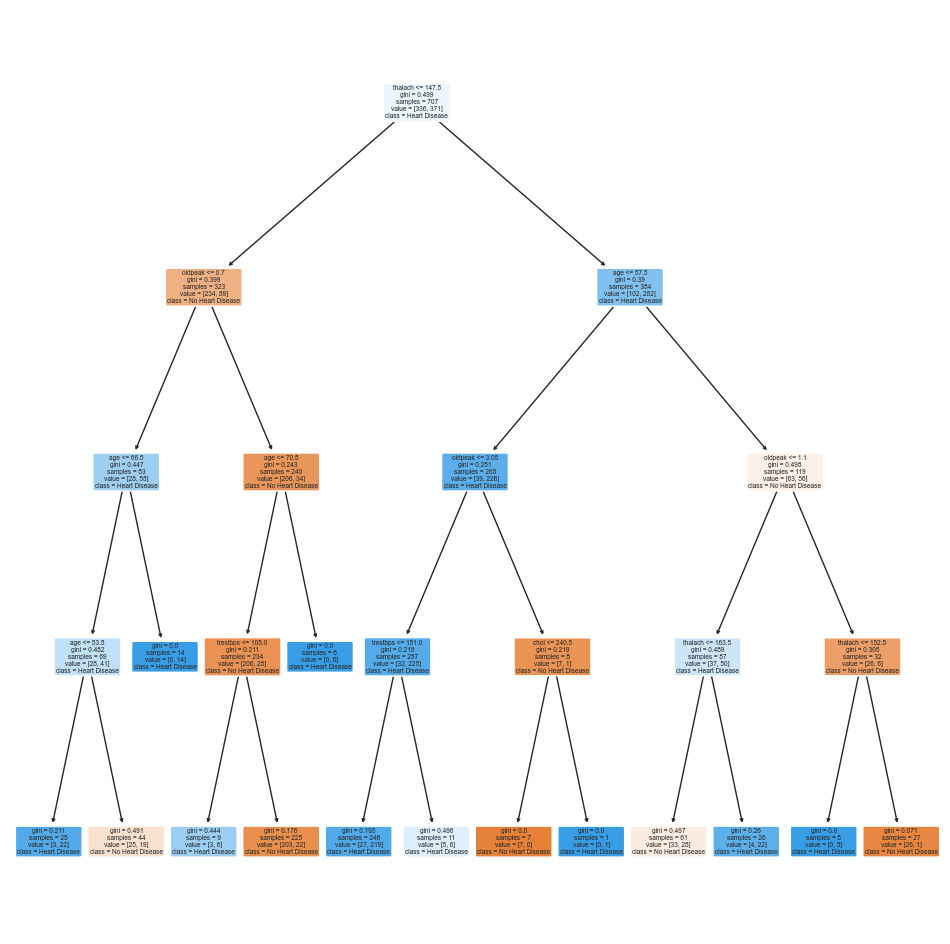

In [21]:
#Create decision tree object
dec_tree = DecisionTreeClassifier(max_depth = 4)

#Make train_splits into a 2 dimensional array
x_train = pd.concat(train_splits, axis=1)

#Train the decision tree model
dec_tree.fit(x_train, target_train)

#Plot the decision tree
f = plt.figure(figsize=(12,12))
plot_tree(dec_tree, filled=True, rounded=True, 
          feature_names = x_train.columns.tolist(),
          class_names=["No Heart Disease","Heart Disease"])